In [1]:
import numpy as np

In [330]:
class SpectralClustering:
    def __init__(self, n_clusters=8, sigma=1, epsilon=0.1, affinity='fully_connected', n_neighbors=10,  assign_labels='kmeans'):
        
        """
        n_clusters-Number of clusters
        affinity=['nearest_neighbors','fully_connect', 'eps_neighbor']-The type of similarity graph
        sigma-A free parameter representing the width of the Gaussian kernel
        n_neighbors-Number of neighbors in 'nearest_neghbors' similarity graph
        assign_labels=['kmeans', 'discretize']-The strategy for assigning labels in the embedding space
        epsilon-Threshold for 'eps_neighbor' similarity graph
        
        """
        self.n_clusters = n_clusters 
        self.sigma=sigma
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        self.assign_labels=assign_labels
        self.epsilon=epsilon
    
    def fit_predict(self,X):
        self.affinity_matrix_=np.ndarray(shape=(len(X),len(X)))
        self.labels_=np.ndarray(shape=len(X))
        self.normalized_laplacian_matrix(X)
        V_=self.eigenvectors_matrix(X)
        if self.assign_labels=='kmeans':
            from sklearn.cluster import KMeans
            kmeans = KMeans(n_clusters=self.n_clusters,n_init=20)
            kmeans.fit(V_)
            self.labels_=kmeans.predict(V_)
        return self.labels_
    
    def eigenvectors_matrix(self,X):
        
        from numpy import linalg as LA
        V_=np.ndarray(shape=(len(X),self.n_clusters))
        eig_val,eig_vect=LA.eig(self.affinity_matrix_)
        #print("num of 0 eigen values: {}".format(len(np.where(eig_val == 0.0))))
        idx = np.argpartition(eig_val, self.n_clusters)
        for i in range(self.n_clusters):
            V_[:,i]=eig_vect[:,idx[i]]
            
        #normalizing V_
        U_=np.ndarray(shape=(len(X),self.n_clusters))
        for i in range(len(X)):
            sum_of_squares=np.sqrt(np.sum(np.square(V_[i])))
            for j in range(self.n_clusters):
                U_[i][j]=V_[i][j]/sum_of_squares
                
        return U_  
        
        
    def sim_matrix(self,X):
        W_=np.zeros(shape=(len(X),len(X)))
        D_=np.zeros(shape=(len(X),len(X)))
        #can use rbf_kernel function to fill the adjacent matrix W_
        if self.affinity=='fully_connected':
            for i in range(len(X)):
                for j in range(len(X)):
                    if i!=j:
                        W_[i][j]=np.exp(-(np.sqrt(np.sum(np.square(X[i]-X[j]))))**2/(2*self.sigma)**2)#gaussian kernel similaity function
           
        elif self.affinity=='nearest_neighbors':
            for i in range(len(X)):
                lst=self.idx_of_knn(X,i)
                for j in lst:
                    if i!=j:
                        W_[i][j]=np.exp(-(np.sqrt(np.sum(np.square(X[i]-X[j]))))**2/self.sigma**2)
        
        elif self.affinity=='eps_neighbor':
            for i in range(len(X)):
                for j in range(len(X)):
                    if i!=j:
                        gaus_f_val=np.exp(-(np.sqrt(np.sum(np.square(X[i]-X[j]))))**2/(2*self.sigma)**2)#gaussian kernel similaity function4
                        if gaus_f_val>=self.epsilon:
                            W_[i][j]=gaus_f_val
        else: pass  
        
        lst=list()
        for i in W_:
            lst.append(np.sum(i))
        np.fill_diagonal(D_,lst)  
        
        return W_,D_     
        
    def idx_of_knn(self,X,i):
        
        list_of_distances=list()
        for j in range(len(X)):
            if i!=j:
                list_of_distances.append((np.sqrt(np.sum(np.square(X[i]-X[j]))),j))
        list_of_distances.sort(key=lambda y: y[0])
        res=list()
        for k in range(self.n_neighbors):
        
            _,index=list_of_distances[k]
            res.append(index)
        
        return res
    
    def normalized_laplacian_matrix(self,X):
        W_,D_=self.sim_matrix(X)
        D_new=np.zeros(shape=(len(X),len(X)))
        lis=D_.diagonal()
        lis=np.sqrt(lis)
        lis=1/lis
        np.fill_diagonal(D_new,lis)
        from numpy.linalg import matrix_power
        self.affinity_matrix_=np.identity(len(X))-D_new@W_@D_new#do we need np.identity(len(X))


<br></br><br></br><br></br><br></br>

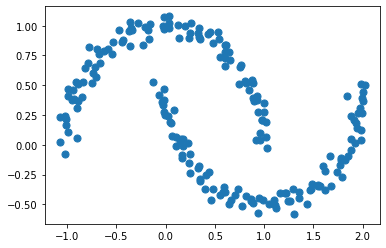

In [349]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X3, y3 = make_moons(200, noise=.05, random_state=0)
plt.scatter(X3[:, 0], X3[:, 1], s=50)

In [350]:
spectral=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',n_neighbors=10)

In [351]:
y=spectral.fit_predict(X3)
y

<ipython-input-330-a08ed7550f6c>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  V_[:,i]=eig_vect[:,idx[i]]


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0])

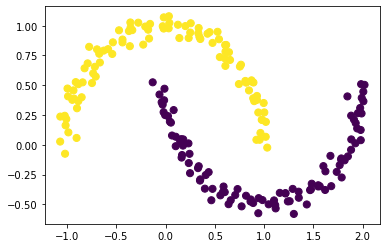

In [352]:
plt.scatter(X3[:, 0], X3[:, 1], c=y, s=50, cmap='viridis')


<br></br>

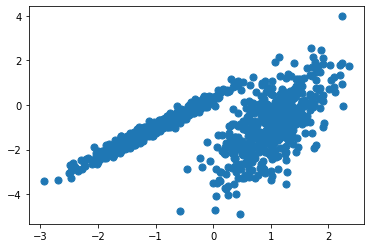

In [353]:
from sklearn.datasets import make_classification

X1, y1 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X1[:, 0], X1[:, 1], s=50);

In [354]:
spectral=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',n_neighbors=10)

In [355]:
y=spectral.fit_predict(X1)


<ipython-input-330-a08ed7550f6c>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  V_[:,i]=eig_vect[:,idx[i]]


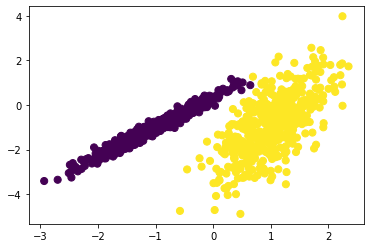

In [356]:
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=50, cmap='viridis')


<br></br>

In [357]:
spectral=SpectralClustering(n_clusters=2, epsilon=0.56, affinity='eps_neighbor')

In [358]:
y=spectral.fit_predict(X1)


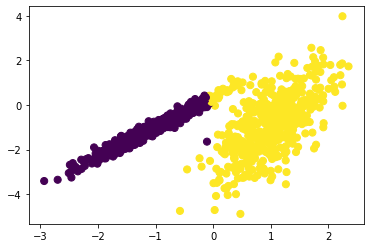

In [359]:
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=50, cmap='viridis')


<br></br>

In [360]:
spectral=SpectralClustering(n_clusters=2, epsilon=0.95, affinity='eps_neighbor')

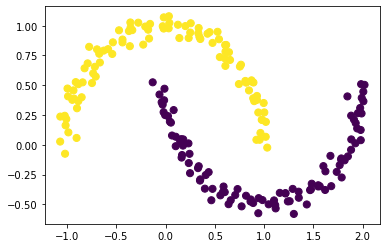

In [361]:
y=spectral.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=y, s=50, cmap='viridis')
